# Assignment Two
## Task D - Handwritten number predictor 

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('./data', train=False, download=True, transform=transform)

In [4]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)

### Model that uses one hidden layer and inherits from nn.Module

In [5]:
class Model(nn.Module):
    
    def __init__(self, in_size=784, out_size=10, layers=[120]):
        super().__init__()
        
        self.fc1 = nn.Linear(in_size, layers[0])
        self.fc2 = nn.Linear(layers[0], out_size)
        
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        
        return nn.functional.softmax(x, dim=1)

#### Optimizing using the Adam optimizer 

In [6]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training the model

In [7]:
epochs = 20
trn_corr = 0

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b, (x_train, y_train) in enumerate(train_loader):
        
        b+=1
    
        y_pred = model(x_train.view(100, -1))
        loss = criterion(y_pred, y_train)
    
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if b % 600 == 0:
            accuracy = trn_corr.item()*100/(100*b)
            print(f'Epoch: {i} Batch: {b} Loss: {loss.item()} Accuracy: {accuracy:.2f}')
    
    

Epoch: 0 Batch: 600 Loss: 1.550575613975525 Accuracy: 86.26
Epoch: 1 Batch: 600 Loss: 1.5165245532989502 Accuracy: 92.88
Epoch: 2 Batch: 600 Loss: 1.518229365348816 Accuracy: 94.26
Epoch: 3 Batch: 600 Loss: 1.4856834411621094 Accuracy: 95.25
Epoch: 4 Batch: 600 Loss: 1.5363191366195679 Accuracy: 95.88
Epoch: 5 Batch: 600 Loss: 1.4692683219909668 Accuracy: 96.32
Epoch: 6 Batch: 600 Loss: 1.4805697202682495 Accuracy: 96.76
Epoch: 7 Batch: 600 Loss: 1.4944491386413574 Accuracy: 97.09
Epoch: 8 Batch: 600 Loss: 1.5173383951187134 Accuracy: 97.36
Epoch: 9 Batch: 600 Loss: 1.504849910736084 Accuracy: 97.67
Epoch: 10 Batch: 600 Loss: 1.4774523973464966 Accuracy: 97.88
Epoch: 11 Batch: 600 Loss: 1.470198154449463 Accuracy: 98.05
Epoch: 12 Batch: 600 Loss: 1.5149160623550415 Accuracy: 98.18
Epoch: 13 Batch: 600 Loss: 1.4945967197418213 Accuracy: 98.31
Epoch: 14 Batch: 600 Loss: 1.4764833450317383 Accuracy: 98.46
Epoch: 15 Batch: 600 Loss: 1.4628286361694336 Accuracy: 98.58
Epoch: 16 Batch: 600 L

### Evaluating the model on test data

In [8]:
test_data_full = DataLoader(test_data, batch_size=10000, shuffle=False)

In [9]:
with torch.no_grad():
    correct = 0
    
    for x_test, y_test in test_data_full:
        
        y_val = model(x_test.view(len(x_test), -1))
        predicted = torch.max(y_val.data, 1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {(correct.item()*100/len(y_test)):2.1f}%')
    

Test accuracy: 97.5%


### W after optimizing

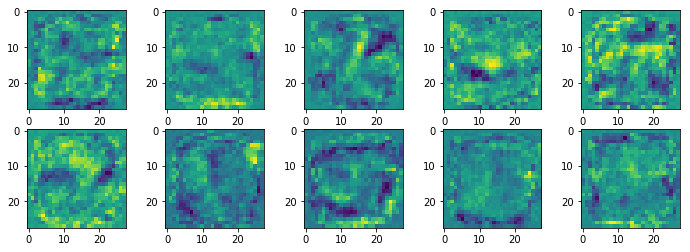

In [12]:
w = list(model.parameters())

fig = plt.figure(figsize=(12,4))

for i in range(1, 11):
    img = w[0][i].reshape(28, 28).detach()
    fig.add_subplot(2, 5, i)
    plt.imshow(img)
    plt.imsave(f'x_train_{i}.png', img)

plt.show()